In [6]:
import cv2

def klt_tracking_and_segmentation(video_path):
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error: Cannot open video.")
        return

    while True:
        ret, frame = cap.read()
        if not ret:
            print("End of video or cannot fetch the frame.")
            break
        
        # Resize only if frame is valid
        frame = cv2.resize(frame, (500, 500))
        
        # Your processing code here
        cv2.imshow("Video", frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# ------------------------------ USAGE ------------------------------
video_path = r"C:/Users/Mr.kishore/Downloads/2637-161442811_small.mp4"
klt_tracking_and_segmentation(video_path)


End of video or cannot fetch the frame.


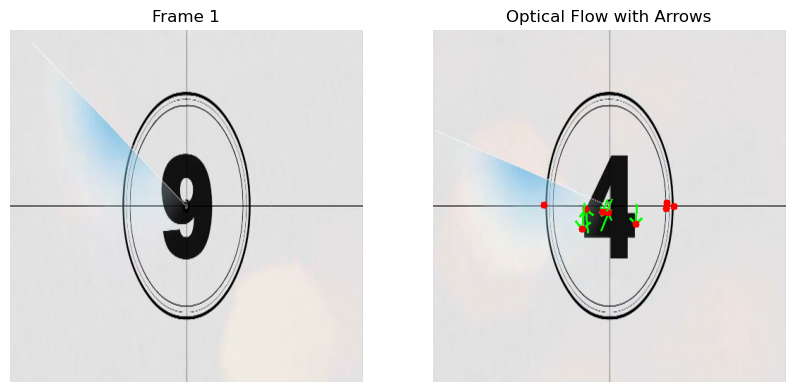

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_two_frames(video_path):
    """Extracts the first and a middle frame from the video."""
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    if total_frames < 2:
        print("Error: Not enough frames in the video.")
        cap.release()
        return None, None

    cap.set(cv2.CAP_PROP_POS_FRAMES, 0)  # First frame
    ret1, frame1 = cap.read()

    cap.set(cv2.CAP_PROP_POS_FRAMES, total_frames // 2)  # Middle frame
    ret2, frame2 = cap.read()

    cap.release()
   
    if ret1 and ret2:
        return frame1, frame2
    else:
        print("Error: Unable to extract frames.")
        return None, None

def lucas_kanade_two_frames(frame1, frame2):
    """Computes and displays Lucas-Kanade optical flow between two extracted frames with arrows."""
    frame1 = cv2.resize(frame1, (500, 500))
    frame2 = cv2.resize(frame2, (500, 500))

    gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    # Shi-Tomasi corner detection
    p0 = cv2.goodFeaturesToTrack(gray1, maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)

    # Lucas-Kanade parameters
    lk_params = dict(winSize=(15, 15), maxLevel=2,
                     criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

    # Compute optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(gray1, gray2, p0, None, **lk_params)

    # Draw optical flow vectors as arrows
    output = frame2.copy()
    if p1 is not None:
        good_new = p1[st == 1]
        good_old = p0[st == 1]

        for new, old in zip(good_new, good_old):
            a, b = new.ravel()
            c, d = old.ravel()
            output = cv2.arrowedLine(output, (int(c), int(d)), (int(a), int(b)), (0, 255, 0), 2, tipLength=0.4)
            output = cv2.circle(output, (int(a), int(b)), 5, (0, 0, 255), -1)

    # Display frames
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))
    plt.title("Frame 1")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    plt.title("Optical Flow with Arrows")
    plt.axis("off")

    plt.show()

def lucas_kanade_video(video_path):
    """Computes and displays optical flow for the entire video with arrows."""
    cap = cv2.VideoCapture(video_path)
    ret, prev_frame = cap.read()
    prev_frame = cv2.resize(prev_frame, (500, 500))
   
    if not ret:
        print("Error: Unable to read the video.")
        return
   
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
   
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame = cv2.resize(frame, (500, 500))
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Compute Optical Flow using Lucas-Kanade
        p0 = cv2.goodFeaturesToTrack(prev_gray, maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)
        p1, st, err = cv2.calcOpticalFlowPyrLK(prev_gray, gray, p0, None, winSize=(15, 15), maxLevel=2,
                                               criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

        output = frame.copy()

        if p1 is not None:
            good_new = p1[st == 1]
            good_old = p0[st == 1]

            for new, old in zip(good_new, good_old):
                a, b = new.ravel()
                c, d = old.ravel()
                output = cv2.arrowedLine(output, (int(c), int(d)), (int(a), int(b)), (0, 255, 0), 2, tipLength=0.4)
                output = cv2.circle(output, (int(a), int(b)), 5, (0, 0, 255), -1)

        cv2.imshow('Optical Flow with Arrows', output)

        if cv2.waitKey(30) & 0xFF == ord('q'):
            break

        prev_gray = gray.copy()
   
    cap.release()
    cv2.destroyAllWindows()

 
# ------------------------------ USAGE ------------------------------
video_path = r"C:/Users/Mr.kishore/Downloads/2637-161442811_small.mp4" # Replace with your video path

# Extract frames & compute optical flow for two images with arrows
frame1, frame2 = extract_two_frames(video_path)
if frame1 is not None and frame2 is not None:
    lucas_kanade_two_frames(frame1, frame2)

# Compute optical flow for full video with arrows
lucas_kanade_video(video_path)